### Import Library

In [1]:
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### EDA 

In [2]:
df = pd.read_csv('train.csv')
df

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,2016,4,3,3,0,4,1,50.87,0.0,0
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,2015,3,1,2,0,6,0,79.91,0.0,0
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,2017,2,1,2,0,4,0,78.38,0.0,0
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,2012,5,5,4,0,4,1,85.94,1.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

In [4]:
labelencoder = LabelEncoder()

label_edit = ['job_level', 'person_level', 'Employee_type', 'marital_status_maried(Y/N)', 'Education_level']

for i in label_edit:
    df[i] = labelencoder.fit_transform(df[i])

In [5]:
print(df['job_level'].unique())
print(df['person_level'].unique())
print(df['Employee_type'].unique())
print(df['marital_status_maried(Y/N)'].unique())
print(df['Education_level'].unique())

[1 2 0]
[2 5 4 3 6 1 0 7]
[0 2 1]
[1 0]
[0 1 2 3 4 5]


### Handling GPA Column 

In [7]:
df.loc[df['GPA'] > 4.00, 'GPA'] = np.nan

df['GPA'].replace(to_replace=0.00, method='ffill', inplace=True)

df['GPA'] = df['GPA'].fillna(df['GPA'].mean())

### Plotting GPA Column 

C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Median: 3.14
Mean: 3.158399454049136
Std Dev: 0.24150948433291275


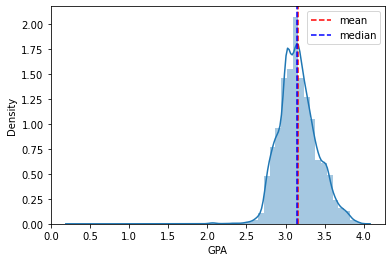

In [10]:
sns.distplot(df['GPA'])
line1 = plt.axvline(df['GPA'].mean(), color="r", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(df['GPA']), color="b", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Median:", np.median(df['GPA']))
print("Mean:", df['GPA'].mean())
print("Std Dev:", np.std(df['GPA']))
plt.show()

In [13]:
df['GPA']

0        2.860000
1        3.158399
2        3.158399
3        3.158399
4        3.158399
           ...   
11148    3.330000
11149    3.000000
11150    3.480000
11151    3.530000
11152    3.140000
Name: GPA, Length: 11153, dtype: float64

### Check GPA Outlier

<AxesSubplot:xlabel='GPA'>

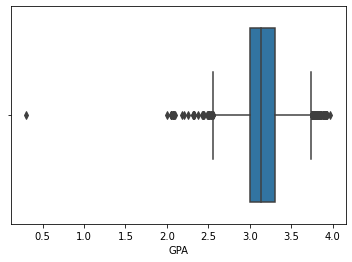

In [15]:
sns.boxplot(x=df['GPA'])

In [11]:
df.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       1
Achievement_above_100%_during3quartal    1
Best Performance                         0
dtype: int64

In [12]:
fill_columns = ['Last_achievement_%', 'Achievement_above_100%_during3quartal']

for i in fill_columns:
    df[i] = df[i].fillna(method='ffill')

In [13]:
df.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       0
Achievement_above_100%_during3quartal    0
Best Performance                         0
dtype: int64

<AxesSubplot:>

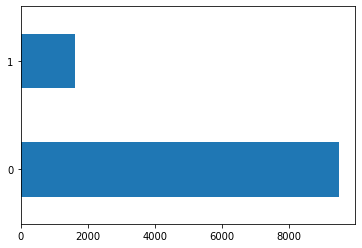

In [14]:
df['Best Performance'].value_counts().plot(kind='barh')

In [15]:
df.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       0
Achievement_above_100%_during3quartal    0
Best Performance                         0
dtype: int64

In [16]:
year = 2021
df['age'] = year - df['age']

In [17]:
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,1,1.352775,2,1.352775,1.732051,0,2,36,1,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,1,1.292285,2,1.292285,1.039230,0,2,32,1,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,2,2.565151,5,2.308679,1.780449,2,1,51,1,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,2,2.828427,5,1.000000,1.385641,0,2,54,1,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,2,2.828427,5,2.828427,0.707107,0,2,56,1,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


### Modeling 

In [18]:
X = df.drop('Best Performance', axis=1)
y = df['Best Performance']

In [19]:
print(X.shape)
print(y.shape)

(11153, 21)
(11153,)


### Undersampling Data with Condensed Nearest Neighbour

In [21]:
undersample = CondensedNearestNeighbour(n_neighbors=1)

In [22]:
X, y = undersample.fit_resample(X, y)

In [24]:
counter = Counter(y)
print(counter)

Counter({0: 3253, 1: 1637})


### Modeling with XGBoost 

In [26]:
xg = xgb.XGBRFClassifier(n_estimators=1000)

In [27]:
xg.fit(X, y)

C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:51:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=1000, n_jobs=12, num_parallel_tree=1000,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [28]:
score1 = cross_val_score(xg, X, y, cv=5, scoring="roc_auc", n_jobs=-1)
print("XGB ROC-AUC Mean Score: ", np.mean(score1))

XGB ROC-AUC Mean Score:  0.543747500117681


### Modeling with Random Forest 

In [30]:
rf = RandomForestClassifier(n_estimators=1000)

In [31]:
rf.fit(X, y)

RandomForestClassifier(n_estimators=1000)

In [33]:
score3 = cross_val_score(rf, X, y, cv=5, scoring="roc_auc", n_jobs=-1)
print("RF ROC-AUC Mean Score: ", np.mean(score3))

RF ROC-AUC Mean Score:  0.5132328556781562


### Predict with Test Data

In [34]:
df_test = pd.read_csv('test.csv')

In [35]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [36]:
common = list(set(X.columns).intersection(set(df_test.columns)))
X = X[common]
df_test = df_test[common]

In [37]:
df_test_baru = MultiColumnLabelEncoder(columns=df_test.select_dtypes(exclude=[np.number])).fit_transform(df_test)

In [38]:
y_pred_xg = xg.predict_proba(df_test_baru)[:,1]

In [39]:
xg_submit = pd.DataFrame(y_pred_xg, columns=['Best Performance'])
xg_submit.index.name='index'

In [40]:
xg_submit.to_csv('code_sumbission5.csv')